In [1]:
import pickle
import seaborn as sns

In [2]:
with open("measure-ours.pkl", "rb") as pkl:
    data = pickle.load(pkl)

data = data.assign(rpp_minus_alpha=data.rpp - data.alpha)
data

,key,protocol,maximum_height,maximum_size,model_hum,protocol_hum,time,n_states,n_actions,n_transitions,...,vi_time,vi_max_value,ss_reachable,ss_nonzero,ss_time,pe_iter,ptrev,rpp,vi_steady_value,rpp_minus_alpha
0,btc-ms-14,bitcoin,0,14,"sm.SelfishMining(Bitcoin(), alpha=0.125, gamma...",Bitcoin(),42.319762,19229,4,95656,...,41.666136,26.126612,187,187,0.055604,2,0.075000,0.150000,14.015470,1.669498e-13
1,byz-3-ms-7,ethereum-bz-3,0,7,"sm.SelfishMining(EthereumByzantium(horizon=3),...",EthereumByzantium(horizon=3),22.759530,14072,6,46608,...,22.349834,28.217270,66,66,0.050061,2,0.125000,0.250000,23.775348,-2.098322e-14
2,par-3-ms-9,parallel-3,0,9,"sm.SelfishMining(Parallel(k=3), alpha=0.125, g...",Parallel(k=3),20.724532,19219,10,86882,...,20.092142,11.687045,124,124,0.052439,2,0.025108,0.052486,4.068359,2.486328e-03
3,btc-ms-14,bitcoin,0,14,"sm.SelfishMining(Bitcoin(), alpha=0.125, gamma...",Bitcoin(),57.240230,19229,4,95656,...,56.416703,56.182266,401,401,0.078360,2,0.196890,0.472883,45.998834,7.288311e-02
4,eth-3-ms-7,ethereum-wp-3,0,7,sm.SelfishMining(EthereumWhitepaper(horizon=3)...,EthereumWhitepaper(horizon=3),26.563765,14072,6,46608,...,26.140537,46.899869,66,66,0.050271,2,0.225000,0.450000,43.626119,-2.381428e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,par-4-ms-9,parallel-4,0,9,"sm.SelfishMining(Parallel(k=4), alpha=0.125, g...",Parallel(k=4),41.531949,15368,10,67760,...,41.121358,57.991448,315,315,0.012103,2,0.216472,0.552660,53.991486,1.526604e-01
212,btc-ms-14,bitcoin,0,14,"sm.SelfishMining(Bitcoin(), alpha=0.125, gamma...",Bitcoin(),62.769082,19229,4,95656,...,62.192173,77.423309,702,702,0.045542,2,0.253951,0.726445,70.832939,2.764450e-01
213,par-2-ms-9,parallel-2,0,9,"sm.SelfishMining(Parallel(k=2), alpha=0.125, g...",Parallel(k=2),40.789621,15177,8,70267,...,40.355343,56.199611,349,349,0.014369,2,0.214480,0.531772,51.512739,1.317715e-01
214,btc-ms-14,bitcoin,0,14,"sm.SelfishMining(Bitcoin(), alpha=0.125, gamma...",Bitcoin(),38.152211,19229,4,95656,...,37.447575,25.933649,156,156,0.002818,2,0.075000,0.150000,14.015470,1.490752e-13


In [3]:
data[(data.ss_reachable - data.ss_nonzero) != 0].drop(
    columns=["model_hum", "protocol_hum"]
)

,key,protocol,maximum_height,maximum_size,time,n_states,n_actions,n_transitions,alpha,gamma,...,vi_time,vi_max_value,ss_reachable,ss_nonzero,ss_time,pe_iter,ptrev,rpp,vi_steady_value,rpp_minus_alpha


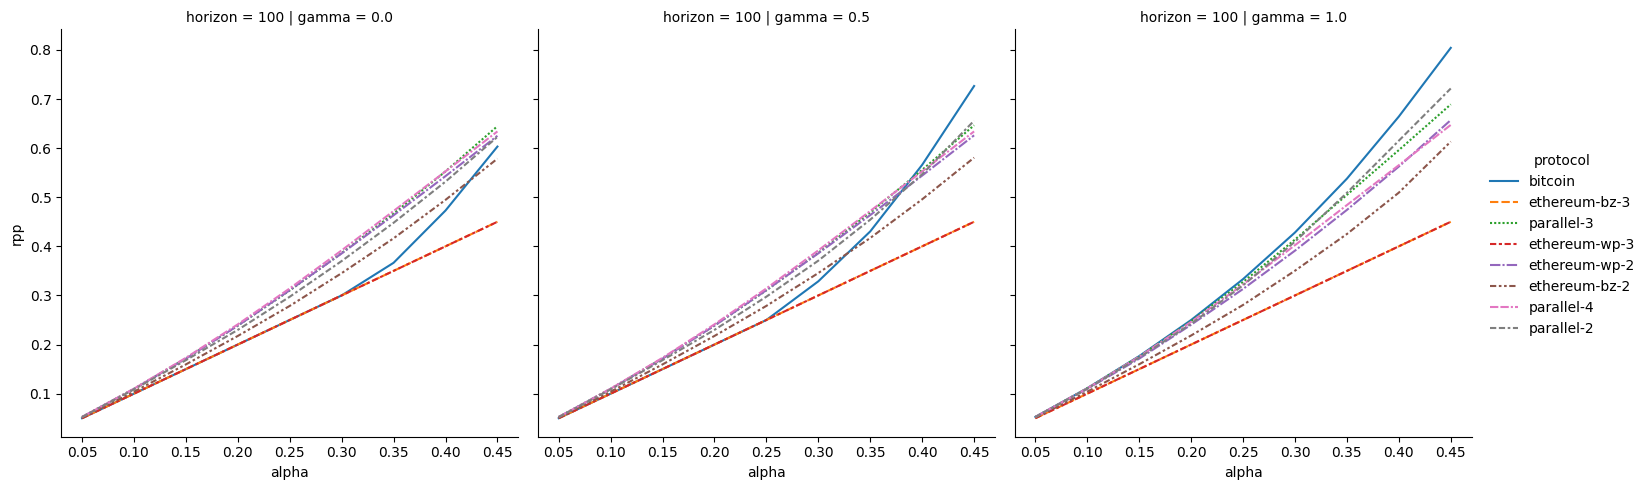

In [4]:
# Compare model w.r.t. reward
sns.relplot(
    data,
    kind="line",
    x="alpha",
    y="rpp",
    col="gamma",
    row="horizon",
    hue="protocol",
    style="protocol",
)

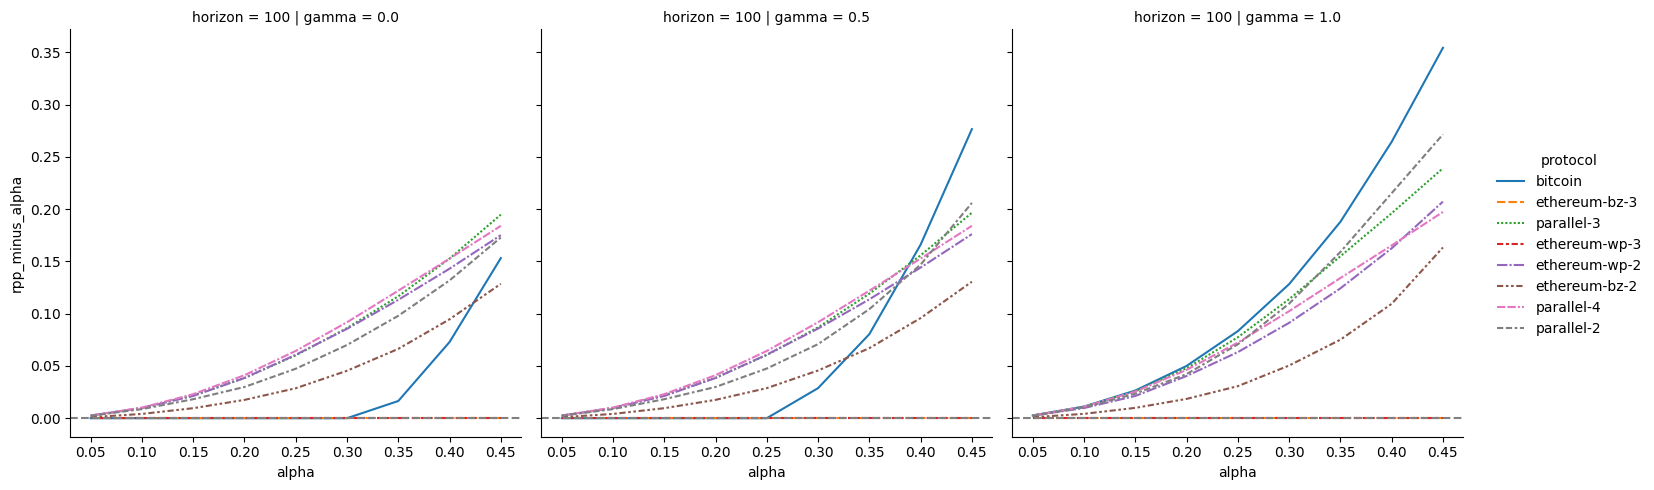

In [5]:
# Compare model w.r.t. reward
sns.relplot(
    data,
    kind="line",
    x="alpha",
    y="rpp_minus_alpha",
    col="gamma",
    row="horizon",
    hue="protocol",
    style="protocol",
).refline(y=0)

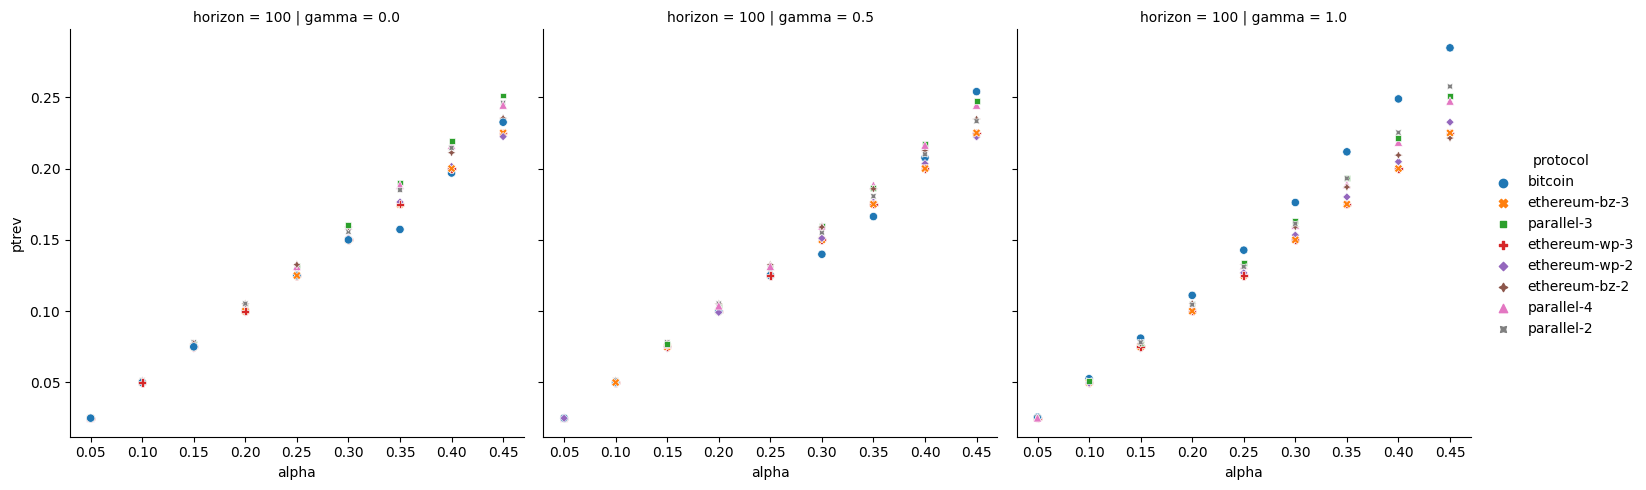

In [6]:
# Compare model w.r.t. reward
sns.relplot(
    data,
    x="alpha",
    y="ptrev",
    col="gamma",
    row="horizon",
    hue="protocol",
    style="protocol",
)

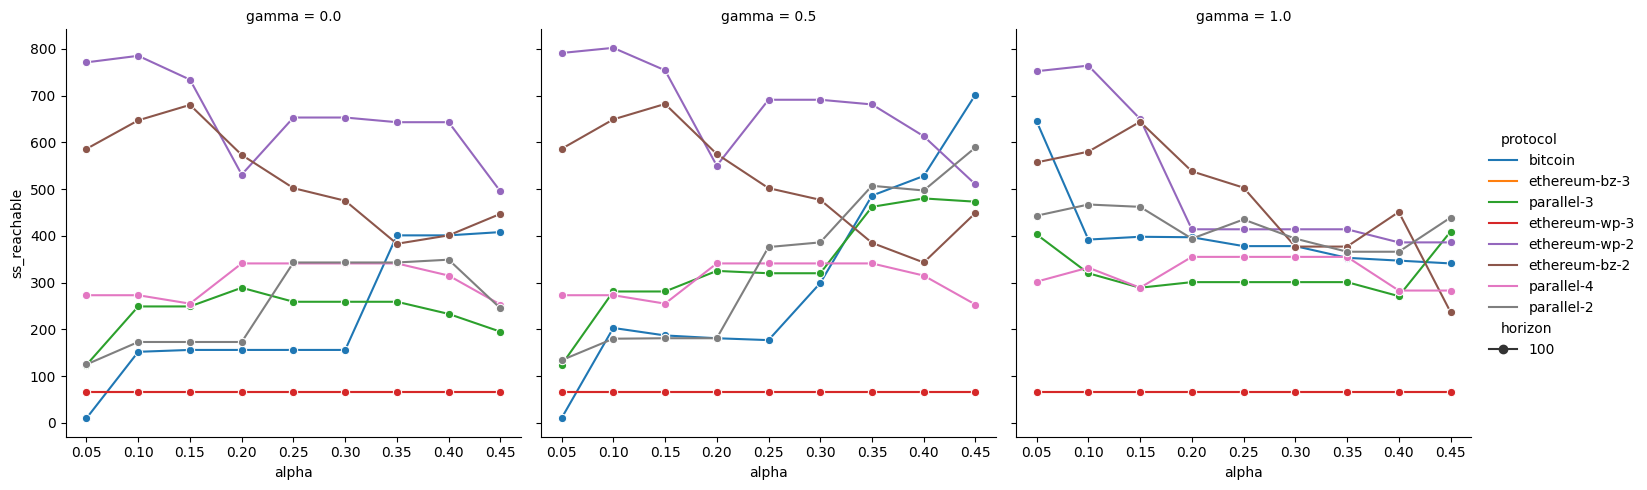

In [7]:
# Compare policy size
sns.relplot(
    data,
    x="alpha",
    y="ss_reachable",
    col="gamma",
    hue="protocol",
    style="horizon",
    kind="line",
    markers=True,
)